## Essay 

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import EditedNearestNeighbours 
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score
from sklearn.metrics import confusion_matrix

### Loading data

In [2]:
#!pwd

In [3]:
#!ls

In [4]:
## loading the data

data=pd.read_csv("creditcard data set.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
### checking the shape of the data

data.shape

(284807, 31)

In [6]:
## checking the summary of our data

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.400941e-16,-1.373150e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.548484e-16,1.056807e-16,-2.406206e-15,...,1.662549e-16,-3.560610e-16,2.608586e-16,4.474413e-15,5.340915e-16,1.686512e-15,-3.684602e-16,-1.193648e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### checking  the names of the columns we have in our data

In [7]:
## checking  the names of the columns we have in our data

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### checking any missing values

In [8]:
data.isnull().sum().values.any()


False

### checking whether the data is balanced 

In [9]:
Data=data[['Amount','Class']].groupby('Class').count()
Data

,Amount
Class,
0,284315
1,492


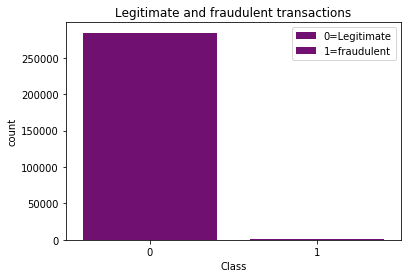

In [15]:
sns.countplot(x='Class',data=data,label='0=Legitimate',color='purple')
sns.countplot(x='Class',data=data,label='1=fraudulent',color='purple')
plt.title('Legitimate and fraudulent transactions')
plt.legend()
plt.show()


### Filtering the relevant features using a correlation matrix

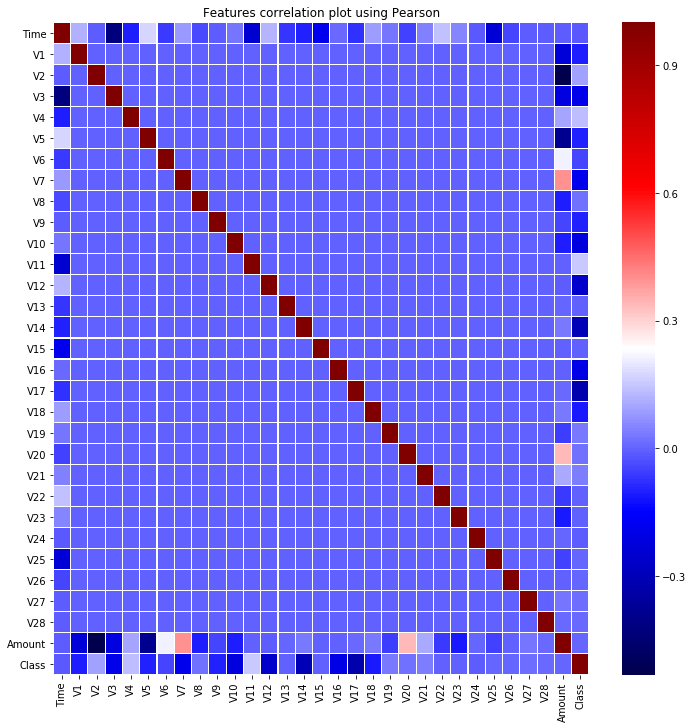

In [20]:

plt.figure(figsize = (12,12))
plt.title('Features correlation plot using Pearson')
corr = data.corr()## generating the correlation matrix
##sns.heatmap(corr)-generating the correlation heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
plt.show()

From the correlation matrix we notice no correlation between the features V1-V28.

The variable Amount has a negative correlation with variables V2 and V5 and a positive correlation with the variables V7 and V20.

The variable time has a negative correlation with the vaarable V3.

### Standardizing the data 

In [5]:
## Standardizing the amount column 
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 
  
# drop Time and Amount columns as they are not relevant for prediction purpose  
data = data.drop(['Time','Amount'], axis = 1) 
  

### Assigning x and y variables

In [6]:
##assigning x and y
##droping the predicted column

y=data.Class
x = data.drop('Class',axis=1)


In [23]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

### Splitting the data into train and test

In [7]:
## Splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42) 
  
## The shape of our train and test data 
print("Number of transactions in the X_train : ", x_train.shape) 
print("Number of transactions in the y_train : ", y_train.shape) 
print("Number of transactions in the X_test : ", x_test.shape) 
print("Number of transactions in the y_test : ", y_test.shape) 

Number of transactions in the X_train :  (199364, 29)
Number of transactions in the y_train :  (199364,)
Number of transactions in the X_test :  (85443, 29)
Number of transactions in the y_test :  (85443,)


In [25]:
## checking the number of columns after dropping our predicted column

x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount'],
      dtype='object')

In [ ]:
## Evaluation metrics

##  Different classifiers using an imbalanced data

## Random Forest

**Random Forest**

**Advantages**

- Does not suffer from overfiting because it takes the average of all the predictions, which cancels out the biases.

**Disadvantages**

- It is time-consuming because it has multiple decision trees and when making any prediction all the trees in the forest has to make prediction for the same input and then a vote is made and the prediction with the highest votes is taken as the final prediction.  


### Fitting a Random Forest Model

In [9]:
## Training the model
random_mod = RandomForestClassifier(n_estimators=400).fit(x_train, y_train)

## Predicting on the training set
ry_pred = random_mod.predict(x_test)

## The evaluation metrics

In [10]:
## After training, we check the accuracy using actual and predicted value

print("The accuracy is:",metrics.accuracy_score(y_test, ry_pred))

The accuracy is: 0.9996371850239341


In [11]:
## The precision,recall and f1-score

print(classification_report(y_test, ry_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [123]:
## The confusion matrix

pd.DataFrame(confusion_matrix(y_test, ry_pred))


,0,1
0,85296,11
1,28,108


## Naive-bayes

**Naive bayes**

**Advantages**
- Naive Bayes has very low computation cost.
- Fast when making predictions.

**Disadvantages**
- The assumption of independent features is almost impossible in real world.

### Fitting a Naive Bayes Model

In [124]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train, y_train)

#Predict the response for test dataset
ny_pred = gaus_naive_mod.predict(x_test)


## Evaluation Metrics

In [125]:
## After training, we check the accuracy using actual and predicted value

print("The accuracy is:",metrics.accuracy_score(y_test, ny_pred))

The accuracy is: 0.9780906569291808


In [126]:
## The precision,recall and f1-score

print(classification_report(y_test, ny_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [1]:
## The confusion matrix

pd.DataFrame(confusion_matrix(y_test, ny_pred))


NameError: name 'pd' is not defined

## Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(x_train, y_train.ravel()) 
  
predictions = lr.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [188]:
pd.DataFrame(confusion_matrix(y_test,predictions))


,0,1
0,85295,12
1,51,85


## Resampling using SMOTE

In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 199008 

After OverSampling, counts of label '1': 199008
After OverSampling, counts of label '0': 199008


In [33]:
x_train_res.shape

(398016, 29)

In [34]:
y_train_res.shape

(398016,)

## KNN

In [46]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_res, y_train_res.ravel())
knn_pred=classifier.predict(x_test)

In [47]:
recall_score(y_test, knn_pred)


0.8970588235294118

In [48]:
precision_score(y_test, knn_pred)


0.44525547445255476

In [49]:
f1_score(y_test, knn_pred)

0.5951219512195122

In [207]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.9980571843217115


In [205]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.45      0.90      0.60       136

    accuracy                           1.00     85443
   macro avg       0.72      0.95      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [206]:
## The confusion matrix

pd.DataFrame(confusion_matrix(y_test, knn_pred))


,0,1
0,85155,152
1,14,122


## Random Forest

In [13]:
smote = RandomForestClassifier(n_estimators=400).fit(x_train_res, y_train_res.ravel())

smote_pred = smote.predict(x_test)



In [15]:
## After training, we check the accuracy using actual and predicted value

print("Accuracy:",metrics.accuracy_score(y_test, smote_pred))

Accuracy: 0.9995435553526912


In [16]:
print(classification_report(y_test, smote_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.87      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [17]:
## The confusion matrix

pd.DataFrame(confusion_matrix(y_test, smote_pred))


,0,1
0,85286,21
1,18,118


In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


## Logistic Regression

In [136]:

lr1 = LogisticRegression() 
lr1.fit(x_train_res, y_train_res.ravel()) 
predictions = lr1.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [138]:
pd.DataFrame(confusion_matrix(y_test, predictions))


,0,1
0,82993,2314
1,10,126


## Naive Bayes

In [189]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_res, y_train_res.ravel())

#Predict the response for test dataset
nby_pred = gaus_naive_mod.predict(x_test)


In [190]:
## The precision,recall and f1-score

print(classification_report(y_test, nby_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.88      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [191]:
pd.DataFrame(confusion_matrix(y_test, nby_pred))


,0,1
0,83295,2012
1,16,120


## Under sampling using Near miss

In [8]:

print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss(version=3) 
  
x_train_miss, y_train_miss = nr.fit_sample(x_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Undersampling, counts of label '1': 356
Before Undersampling, counts of label '0': 199008 

After Undersampling, the shape of train_X: (656, 29)
After Undersampling, the shape of train_y: (656,) 

After Undersampling, counts of label '1': 356
After Undersampling, counts of label '0': 300


/home/carolyne/.local/lib/python3.7/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


## Random forest

### Hyperparameter tuning - RF -Nearmiss

In [ ]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2'],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model1 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 5, verbose= 5, random_state= 101, n_jobs = -1)
model1.fit(x_train_miss, y_train_miss)
print(model1.best_estimator_)

### Random Forest- Near miss

In [9]:
nearmiss = RandomForestClassifier(n_estimators=100).fit(x_train_miss, y_train_miss.ravel())

nearmiss_pred = nearmiss.predict(x_test)



In [10]:
print(classification_report(y_test, nearmiss_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.17      0.86      0.29       136

    accuracy                           0.99     85443
   macro avg       0.59      0.93      0.64     85443
weighted avg       1.00      0.99      1.00     85443



In [39]:
pd.DataFrame(confusion_matrix(y_test, nearmiss_pred ))


,0,1
0,84808,499
1,19,117


## Naive Bayes

In [40]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_miss, y_train_miss.ravel())

#Predict the response for test dataset
Nby_pred = gaus_naive_mod.predict(x_test)


In [41]:
print(classification_report(y_test, Nby_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.12      0.57      0.20       136

    accuracy                           0.99     85443
   macro avg       0.56      0.78      0.60     85443
weighted avg       1.00      0.99      1.00     85443



In [42]:
pd.DataFrame(confusion_matrix(y_test, Nby_pred))


,0,1
0,84753,554
1,59,77


## KNN

### Hyperparameter tuning - KNN

In [ ]:
from sklearn.grid_search import RandomizedSearchCV
# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# if parameters are continuous (like regularization)

# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
knn=KNeighborsClassifier()
rand1 = RandomizedSearchCV(knn, param_dist, cv=5, scoring='accuracy', n_iter=80, random_state=5)

# fit
rand1.fit(x_train_miss, y_train_miss)
print(rand1.best_estimator_)


### KNN- Nearmiss

In [46]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_miss, y_train_miss.ravel())
Knn_Pred=classifier.predict(x_test)

In [47]:
## The precision,recall and f1-score

print(classification_report(y_test, Knn_Pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.20      0.80      0.32       136

    accuracy                           0.99     85443
   macro avg       0.60      0.90      0.66     85443
weighted avg       1.00      0.99      1.00     85443



In [49]:
pd.DataFrame(confusion_matrix(y_test, Knn_Pred))


,0,1
0,84872,435
1,27,109


## SVC

In [50]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train_miss, y_train_miss)
SVc_Pred=classifier.predict(x_test)

In [52]:
# print classification report 
print(classification_report(y_test, SVc_Pred )) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.20      0.80      0.32       136

    accuracy                           0.99     85443
   macro avg       0.60      0.90      0.66     85443
weighted avg       1.00      0.99      1.00     85443



In [53]:
pd.DataFrame(confusion_matrix(y_test, SVc_Pred))


,0,1
0,84872,435
1,27,109


## Oversampling(SMOTE) followed by under sampling(Tomek links)

In [19]:
smt = SMOTETomek(random_state=2)
x_train_smt, y_train_smt = smt.fit_sample(x_train, y_train)


In [36]:
print("The shape is:",x_train_smt.shape)

The shape is: (398016, 29)


In [38]:
y_train_smt.shape

(398016,)

## KNN

### Hyperparameter Tuning -KNN- Smote+tomeklink

In [ ]:
from sklearn.grid_search import RandomizedSearchCV
# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# if parameters are continuous (like regularization)

# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
Knn=KNeighborsClassifier()
rand2 = RandomizedSearchCV(Knn, param_dist, cv=5, scoring='accuracy', n_iter=80, random_state=5)

# fit
rand2.fit(x_train_smt, y_train_smt)

print(rand2.best_estimator_)


### KNN - smote+tomek link

In [210]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_smt, y_train_smt.ravel())
Knn_pred=classifier.predict(x_test)

In [211]:
## The precision,recall and f1-score

print(classification_report(y_test, Knn_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.45      0.90      0.60       136

    accuracy                           1.00     85443
   macro avg       0.72      0.95      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [212]:
pd.DataFrame(confusion_matrix(y_test, Knn_pred))


,0,1
0,85155,152
1,14,122


In [ ]:
RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

## Random Forest

### Hyperparameter Tuning -Rf- Smote + Tomeklink

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2'],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model2 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 5, verbose= 5, random_state= 101, n_jobs = -1)
model2.fit(x_train_smt, y_train_smt)
print(model2.best_estimator_)

### Tomek link - Random forest

In [20]:
smotek = RandomForestClassifier(n_jobs = -1,
                                random_state = 42).fit(x_train_smt, y_train_smt.ravel())

smotek_pred = smotek.predict(x_test)



In [21]:
## The precision,recall and f1-score

print(classification_report(y_test, smotek_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.88      0.87       136

    accuracy                           1.00     85443
   macro avg       0.93      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
pd.DataFrame(confusion_matrix(y_test, smotek_pred))


,0,1
0,85287,20
1,17,119


## Naive Bayes

In [196]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_smt, y_train_smt.ravel())

#Predict the response for test dataset
Nnby_pred = gaus_naive_mod.predict(x_test)


In [197]:
## The precision,recall and f1-score

print(classification_report(y_test, Nnby_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.88      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [199]:
pd.DataFrame(confusion_matrix(y_test, Nnby_pred))


,0,1
0,83295,2012
1,16,120


## Logistic Regression

In [169]:
lr = LogisticRegression() 
lr.fit(x_train_smt, y_train_smt.ravel()) 
prediction = lr.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, prediction)) 


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [195]:
pd.DataFrame(confusion_matrix(y_test, prediction))


,0,1
0,82993,2314
1,10,126


## SVC

In [56]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train_smt, y_train_smt)
SVc_pred=classifier.predict(x_test)

In [57]:
# print classification report 
print(classification_report(y_test, SVc_pred )) 

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     85307
           1       0.00      0.92      0.01       136

    accuracy                           0.57     85443
   macro avg       0.50      0.74      0.37     85443
weighted avg       1.00      0.57      0.72     85443



In [58]:
pd.DataFrame(confusion_matrix(y_test, SVc_pred))


,0,1
0,48602,36705
1,11,125


## Edited Nearest Neighbors

In [36]:
renn = EditedNearestNeighbours()
x_train_enn, y_train_enn= renn.fit_resample(x_train, y_train.ravel())

## Random Forest

In [183]:
editednn = RandomForestClassifier(n_estimators=10).fit(x_train_enn, y_train_enn.ravel())

editednn_pred = editednn.predict(x_test)



In [184]:
# print classification report 
print(classification_report(y_test, editednn_pred )) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.82      0.82       136

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [186]:
pd.DataFrame(confusion_matrix(y_test, editednn_pred))


,0,1
0,85283,24
1,24,112


## Naive Bayes

In [200]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_enn, y_train_enn.ravel())

#Predict the response for test dataset
NBy_pred = gaus_naive_mod.predict(x_test)


In [201]:
# print classification report 
print(classification_report(y_test, NBy_pred )) 


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [202]:
pd.DataFrame(confusion_matrix(y_test, NBy_pred))


,0,1
0,83446,1861
1,21,115


## k-NN

In [215]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_enn, y_train_enn.ravel())
KNn_pred=classifier.predict(x_test)

In [216]:
# print classification report 
print(classification_report(y_test, KNn_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.81      0.81       136

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [217]:
pd.DataFrame(confusion_matrix(y_test, KNn_pred))


,0,1
0,85283,24
1,26,110


## SVC

In [37]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train_enn, y_train_enn)
svc_pred=classifier.predict(x_test)

In [38]:
# print classification report 
print(classification_report(y_test, svc_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.79      0.82       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
pd.DataFrame(confusion_matrix(y_test, svc_pred))


,0,1
0,85290,17
1,29,107


## Undersampling(ENN rule) followed by undersampling(CNN rule)

## Edited Nearest Neighbor and Condensed Nearest Neighbor

In [61]:
Ncr=NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr= Ncr.fit_resample(x_train, y_train.ravel())

## Random Forest

### Hyperparameter tuning - RF -ENN+CNN

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2'],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model3 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 5, verbose= 5, random_state= 101, n_jobs = -1)
model3.fit(x_train_ncr, y_train_ncr)

print(model3.best_estimator_)

### Random Forest - ENN+CNN

In [24]:
ecnn = RandomForestClassifier(n_estimators=400).fit(x_train_ncr, y_train_ncr.ravel())

ecnn_pred = ecnn.predict(x_test)



In [25]:
# print classification report 
print(classification_report(y_test, ecnn_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.85      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
pd.DataFrame(confusion_matrix(y_test, ecnn_pred))


,0,1
0,85286,21
1,21,115


## Naive bayes

In [224]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_ncr, y_train_ncr.ravel())

#Predict the response for test dataset
NBY_pred = gaus_naive_mod.predict(x_test)


In [225]:
# print classification report 
print(classification_report(y_test, NBY_pred)) 


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [226]:
pd.DataFrame(confusion_matrix(y_test, NBY_pred))


,0,1
0,83442,1865
1,21,115


## KNN

### Hyperparameter tuning - KNN -EnN+cNN

In [ ]:
from sklearn.grid_search import RandomizedSearchCV
# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# if parameters are continuous (like regularization)

# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
KNn=KNeighborsClassifier()
rand3 = RandomizedSearchCV(KNn, param_dist, cv=5, scoring='accuracy', n_iter=80, random_state=5)

# fit
rand3.fit(x_train_ncr, y_train_ncr)


print(rand3.best_estimator_)


### KNN- ENN+CNN

In [66]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(x_train_ncr, y_train_ncr.ravel())
KNN_pred=classifier.predict(x_test)

In [64]:
# print classification report 
print(classification_report(y_test, KNN_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.82      0.83       136

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
pd.DataFrame(confusion_matrix(y_test, KNN_pred))


,0,1
0,85285,22
1,25,111


## SVC

In [42]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train_ncr, y_train_ncr)
Svc_pred=classifier.predict(x_test)

In [43]:
print(classification_report(y_test, Svc_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.79      0.82       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [44]:
pd.DataFrame(confusion_matrix(y_test, Svc_pred))


,0,1
0,85290,17
1,29,107


### Undersampling(Tomek links) followed by an undersampling(CNN rule)

In [26]:
OSS=OneSidedSelection()
x_train_oss, y_train_oss= OSS.fit_resample(x_train, y_train.ravel())

## Random Forest

In [240]:
ctomel = RandomForestClassifier(n_estimators=10).fit(x_train_oss, y_train_oss.ravel())

ctomel_pred = ctomel.predict(x_test)


In [241]:
# print classification report 
print(classification_report(y_test, ctomel_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.78      0.85       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [242]:
pd.DataFrame(confusion_matrix(y_test, ctomel_pred))

,0,1
0,85300,7
1,30,106


## Naive Bayes

In [243]:
#Create a Gaussian Classifier
gaus_naive_mod = GaussianNB()

# Train the model using the training sets
gaus_naive_mod.fit(x_train_oss, y_train_oss.ravel())

#Predict the response for test dataset
NBY_Pred = gaus_naive_mod.predict(x_test)


In [244]:
# print classification report 
print(classification_report(y_test, NBY_Pred)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [245]:
pd.DataFrame(confusion_matrix(y_test, NBY_Pred))

,0,1
0,83468,1839
1,21,115


## KNN

In [27]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_oss, y_train_oss.ravel())
KNN_Pred=classifier.predict(x_test)

In [28]:
# print classification report 
print(classification_report(y_test, KNN_Pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.79      0.82       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
pd.DataFrame(confusion_matrix(y_test, KNN_Pred))

,0,1
0,85290,17
1,29,107


## Receiver Operating Characteristic (ROC)